In [1]:
import pandas as pd
from m2cgen import export_to_c
from sklearn.feature_selection import mutual_info_classif

In [2]:
dtypes = {
    'filter_idx': 'string',
    'bsize': 'string',
    'skip_pred': 'int',
    'num_planes': 'int',
    'tmp_rs': 'int',
    'min_rd': 'int64',
    'switchable_rate': 'int',
    'rd': 'int64',
    'last_best__as_filters__x_filter': 'string',
    'last_best__as_filters__y_filter': 'string',
    'discard': 'bool',
    'x__qindex': 'int',
    'x__delta_qindex': 'int',
    'x__rdmult_delta_qindex': 'int',
    'x__rdmult_cur_qindex': 'int',
    'x__rdmult': 'int',
    'x__intra_sb_rdmult_modifier': 'int',
    'x__rb': 'float',
    'x__mb_energy': 'int',
    'x__sb_energy_level': 'int',
    'x__errorperbit': 'int',
    'x__sadperbit': 'int',
    'x__seg_skip_block': 'int',
    'x__actual_num_seg1_blocks': 'int',
    'x__actual_num_seg2_blocks': 'int',
    'x__cnt_zeromv': 'int',
    'x__force_zeromv_skip_for_sb': 'int',
    'x__force_zeromv_skip_for_blk': 'int',
    'x__nonrd_prune_ref_frame_search': 'int',
    'x__must_find_valid_partition': 'int',
    'x__skip_mode': 'int',
    'x__winner_mode_count': 'int',
    'x__recalc_luma_mc_data': 'int',
    'x__reuse_inter_pred': 'int',
    'x__source_variance': 'int',
    'x__block_is_zero_sad': 'int',
    'x__sb_me_partition': 'int',
    'x__sb_me_block': 'int',
    'x__sb_force_fixed_part': 'int',
    'x__try_merge_partition': 'int',
    'x__palette_pixels': 'int',
    'x__plane__0__src_diff': 'int',
    'x__plane__0__dqcoeff': 'int',
    'x__plane__0__qcoeff': 'int',
    'x__plane__0__coeff': 'int',
    'x__plane__0__eobs': 'int',
    'x__plane__0__quant_fp_QTX': 'int',
    'x__plane__0__round_fp_QTX': 'int',
    'x__plane__0__quant_QTX': 'int',
    'x__plane__0__round_QTX': 'int',
    'x__plane__0__quant_shift_QTX': 'int',
    'x__plane__0__zbin_QTX': 'int',
    'x__plane__0__dequant_QTX': 'int',
    'xd__mi_row': 'int',
    'xd__mi_col': 'int',
    'xd__mi_stride': 'int',
    'xd__is_chroma_ref': 'int',
    'xd__up_available': 'int',
    'xd__left_available': 'int',
    'xd__chroma_up_available': 'int',
    'xd__chroma_left_available': 'int',
    'xd__tx_type_map_stride': 'int',
    'xd__mb_to_left_edge': 'int',
    'xd__mb_to_right_edge': 'int',
    'xd__mb_to_top_edge': 'int',
    'xd__mb_to_bottom_edge': 'int',
    'xd__width': 'int',
    'xd__height': 'int',
    'xd__is_last_vertical_rect': 'int',
    'xd__is_first_horizontal_rect': 'int',
    'xd__bd': 'int',
    'xd__current_base_qindex': 'int',
    'xd__cur_frame_force_integer_mv': 'int',
    'xd__delta_lf_from_base': 'int',
    'xd__block_ref_scale_factors__0__x_scale_fp': 'int',
    'xd__block_ref_scale_factors__0__y_scale_fp': 'int',
    'xd__block_ref_scale_factors__0__x_step_q4': 'int',
    'xd__block_ref_scale_factors__0__y_step_q4': 'int',
    'xd__block_ref_scale_factors__1__x_scale_fp': 'int',
    'xd__block_ref_scale_factors__1__y_scale_fp': 'int',
    'xd__block_ref_scale_factors__1__x_step_q4': 'int',
    'xd__block_ref_scale_factors__1__y_step_q4': 'int',
    'xd__plane__0__plane_type': 'string',
    'xd__plane__0__subsampling_x': 'int',
    'xd__plane__0__width': 'int',
    'xd__plane__0__height': 'int',
    'xd__plane__1__plane_type': 'string',
    'xd__plane__1__subsampling_x': 'int',
    'xd__plane__1__width': 'int',
    'xd__plane__1__height': 'int',
    'xd__plane__2__plane_type': 'string',
    'xd__plane__2__subsampling_x': 'int',
    'xd__plane__2__width': 'int',
    'xd__plane__2__height': 'int',
    'xd__tile__mi_row_start': 'int',
    'xd__tile__mi_row_end': 'int',
    'xd__tile__mi_col_start': 'int',
    'xd__tile__mi_col_end': 'int',
    'xd__tile__tile_row': 'int',
    'xd__tile__tile_col': 'int',
    'x__e_mbd__mi__0__bsize': 'string',
    'x__e_mbd__mi__0__partition': 'string',
    'x__e_mbd__mi__0__mode': 'string',
    'x__e_mbd__mi__0__uv_mode': 'string',
    'x__e_mbd__mi__0__current_qindex': 'int',
    'x__e_mbd__mi__0__motion_mode': 'string',
    'x__e_mbd__mi__0__num_proj_ref': 'int',
    'x__e_mbd__mi__0__overlappable_neighbors': 'int',
    'x__e_mbd__mi__0__interintra_mode': 'string',
    'x__e_mbd__mi__0__interintra_wedge_index': 'int',
    'x__e_mbd__mi__0__cfl_alpha_signs': 'int',
    'x__e_mbd__mi__0__cfl_alpha_idx': 'int',
    'x__e_mbd__mi__0__skip_txfm': 'int',
    'x__e_mbd__mi__0__tx_size': 'int',
    'x__e_mbd__mi__0__ref_mv_idx': 'int',
    'x__e_mbd__mi__0__skip_mode': 'int',
    'x__e_mbd__mi__0__use_intrabc': 'int',
    'x__e_mbd__mi__0__comp_group_idx': 'int',
    'x__e_mbd__mi__0__compound_idx': 'int',
    'x__e_mbd__mi__0__use_wedge_interintra': 'int',
    'x__e_mbd__mi__0__cdef_strength': 'int',
    'x__e_mbd__mi__0__interp_filters__as_filters__y_filter': 'string',
    'x__e_mbd__mi__0__interp_filters__as_filters__x_filter': 'string',
    'x__e_mbd__mi__0__mv__0__as_mv__row': 'int',
    'x__e_mbd__mi__0__mv__1__as_mv__col': 'int',
    'xd__left_x__e_mbd__mi__0__bsize': 'string',
    'xd__left_x__e_mbd__mi__0__partition': 'string',
    'xd__left_x__e_mbd__mi__0__mode': 'string',
    'xd__left_x__e_mbd__mi__0__uv_mode': 'string',
    'xd__left_x__e_mbd__mi__0__current_qindex': 'int',
    'xd__left_x__e_mbd__mi__0__motion_mode': 'string',
    'xd__left_x__e_mbd__mi__0__num_proj_ref': 'int',
    'xd__left_x__e_mbd__mi__0__overlappable_neighbors': 'int',
    'xd__left_x__e_mbd__mi__0__interintra_mode': 'string',
    'xd__left_x__e_mbd__mi__0__interintra_wedge_index': 'int',
    'xd__left_x__e_mbd__mi__0__cfl_alpha_signs': 'int',
    'xd__left_x__e_mbd__mi__0__cfl_alpha_idx': 'int',
    'xd__left_x__e_mbd__mi__0__skip_txfm': 'int',
    'xd__left_x__e_mbd__mi__0__tx_size': 'int',
    'xd__left_x__e_mbd__mi__0__ref_mv_idx': 'int',
    'xd__left_x__e_mbd__mi__0__skip_mode': 'int',
    'xd__left_x__e_mbd__mi__0__use_intrabc': 'int',
    'xd__left_x__e_mbd__mi__0__comp_group_idx': 'int',
    'xd__left_x__e_mbd__mi__0__compound_idx': 'int',
    'xd__left_x__e_mbd__mi__0__use_wedge_interintra': 'int',
    'xd__left_x__e_mbd__mi__0__cdef_strength': 'int',
    'xd__left_x__e_mbd__mi__0__interp_filters__as_filters__y_filter': 'string',
    'xd__left_x__e_mbd__mi__0__interp_filters__as_filters__x_filter': 'string',
    'xd__left_x__e_mbd__mi__0__mv__0__as_mv__row': 'int',
    'xd__left_x__e_mbd__mi__0__mv__1__as_mv__col': 'int',
    'xd__above_x__e_mbd__mi__0__bsize': 'string',
    'xd__above_x__e_mbd__mi__0__partition': 'string',
    'xd__above_x__e_mbd__mi__0__mode': 'string',
    'xd__above_x__e_mbd__mi__0__uv_mode': 'string',
    'xd__above_x__e_mbd__mi__0__current_qindex': 'int',
    'xd__above_x__e_mbd__mi__0__motion_mode': 'string',
    'xd__above_x__e_mbd__mi__0__num_proj_ref': 'int',
    'xd__above_x__e_mbd__mi__0__overlappable_neighbors': 'int',
    'xd__above_x__e_mbd__mi__0__interintra_mode': 'string',
    'xd__above_x__e_mbd__mi__0__interintra_wedge_index': 'int',
    'xd__above_x__e_mbd__mi__0__cfl_alpha_signs': 'int',
    'xd__above_x__e_mbd__mi__0__cfl_alpha_idx': 'int',
    'xd__above_x__e_mbd__mi__0__skip_txfm': 'int',
    'xd__above_x__e_mbd__mi__0__tx_size': 'int',
    'xd__above_x__e_mbd__mi__0__ref_mv_idx': 'int',
    'xd__above_x__e_mbd__mi__0__skip_mode': 'int',
    'xd__above_x__e_mbd__mi__0__use_intrabc': 'int',
    'xd__above_x__e_mbd__mi__0__comp_group_idx': 'int',
    'xd__above_x__e_mbd__mi__0__compound_idx': 'int',
    'xd__above_x__e_mbd__mi__0__use_wedge_interintra': 'int',
    'xd__above_x__e_mbd__mi__0__cdef_strength': 'int',
    'xd__above_x__e_mbd__mi__0__interp_filters__as_filters__y_filter': 'string',
    'xd__above_x__e_mbd__mi__0__interp_filters__as_filters__x_filter': 'string',
    'xd__above_x__e_mbd__mi__0__mv__0__as_mv__row': 'int',
    'xd__above_x__e_mbd__mi__0__mv__1__as_mv__col': 'int',
    'rd_stats__rate': 'int',
    'rd_stats__zero_rate': 'int',
    'rd_stats__dist': 'int64',
    'rd_stats__rdcost': 'int64',
    'rd_stats__sse': 'int64',
    'rd_stats__skip_txfm': 'int',
    'rd_stats_luma__rate': 'int',
    'rd_stats_luma__zero_rate': 'int',
    'rd_stats_luma__dist': 'int64',
    'rd_stats_luma__rdcost': 'int64',
    'rd_stats_luma__sse': 'int64',
    'rd_stats_luma__skip_txfm': 'int',
    'cpi__skip_tpl_setup_stats': 'int',
    'cpi__tpl_rdmult_scaling_factors': 'float',
    'cpi__rt_reduce_num_ref_buffers': 'int',
    'cpi__framerate': 'float',
    'cpi__ref_frame_flags': 'int',
    'cpi__speed': 'int',
    'cpi__all_one_sided_refs': 'int',
    'cpi__gf_frame_index': 'int',
    'cpi__droppable': 'int',
    'cpi__data_alloc_width': 'int',
    'cpi__data_alloc_height': 'int',
    'cpi__initial_mbs': 'int',
    'cpi__frame_size_related_setup_done': 'int',
    'cpi__last_coded_width': 'int',
    'cpi__last_coded_height': 'int',
    'cpi__num_frame_recode': 'int',
    'cpi__intrabc_used': 'int',
    'cpi__prune_ref_frame_mask': 'int',
    'cpi__use_screen_content_tools': 'int',
    'cpi__is_screen_content_type': 'int',
    'cpi__frame_header_count': 'int',
    'cpi__deltaq_used': 'int',
    'cpi__last_frame_type': 'string',
    'cpi__num_tg': 'int',
    'cpi__superres_mode': 'string',
    'cpi__fp_block_size': 'string',
    'cpi__sb_counter': 'int',
    'cpi__ref_refresh_index': 'int',
    'cpi__refresh_idx_available': 'int',
    'cpi__ref_idx_to_skip': 'int',
    'cpi__do_frame_data_update': 'int',
    'cpi__ext_rate_scale': 'float',
    'cpi__weber_bsize': 'string',
    'cpi__norm_wiener_variance': 'int64',
    'cpi__is_dropped_frame': 'int',
    'cpi__rec_sse': 'int64',
    'cpi__frames_since_last_update': 'int',
    'cpi__palette_pixel_num': 'int',
    'cpi__scaled_last_source_available': 'int',
    'cpi__ppi__ts_start_last_show_frame': 'int64',
    'cpi__ppi__ts_end_last_show_frame': 'int64',
    'cpi__ppi__num_fp_contexts': 'int',
    'cpi__ppi__filter_level__0': 'int',
    'cpi__ppi__filter_level__1': 'int',
    'cpi__ppi__filter_level_u': 'int',
    'cpi__ppi__filter_level_v': 'int',
    'cpi__ppi__seq_params_locked': 'int',
    'cpi__ppi__internal_altref_allowed': 'int',
    'cpi__ppi__show_existing_alt_ref': 'int',
    'cpi__ppi__lap_enabled': 'int',
    'cpi__ppi__b_calculate_psnr': 'int',
    'cpi__ppi__frames_left': 'int',
    'cpi__ppi__use_svc': 'int',
    'cpi__ppi__buffer_removal_time_present': 'int',
    'cpi__ppi__number_temporal_layers': 'int',
    'cpi__ppi__number_spatial_layers': 'int',
    'cpi__ppi__tpl_sb_rdmult_scaling_factors': 'float',
    'cpi__ppi__gf_group__max_layer_depth': 'int',
    'cpi__ppi__gf_group__max_layer_depth_allowed': 'int',
    'cpi__ppi__gf_state__arf_gf_boost_lst': 'int',
    'cpi__ppi__twopass__section_intra_rating': 'int',
    'cpi__ppi__twopass__first_pass_done': 'int',
    'cpi__ppi__twopass__bits_left': 'int64',
    'cpi__ppi__twopass__modified_error_min': 'float',
    'cpi__ppi__twopass__modified_error_max': 'float',
    'cpi__ppi__twopass__modified_error_left': 'float',
    'cpi__ppi__twopass__kf_group_bits': 'int64',
    'cpi__ppi__twopass__kf_group_error_left': 'float',
    'cpi__ppi__twopass__bpm_factor': 'float',
    'cpi__ppi__twopass__rolling_arf_group_target_bits': 'int',
    'cpi__ppi__twopass__rolling_arf_group_actual_bits': 'int',
    'cpi__ppi__twopass__sr_update_lag': 'int',
    'cpi__ppi__twopass__kf_zeromotion_pct': 'int',
    'cpi__ppi__twopass__last_kfgroup_zeromotion_pct': 'int',
    'cpi__ppi__twopass__extend_minq': 'int',
    'cpi__ppi__twopass__extend_maxq': 'int',
    'cpi__ppi__twopass__firstpass_info__total_stats__frame': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__weight': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__intra_error': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__frame_avg_wavelet_energy': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__coded_error': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__sr_coded_error': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__pcnt_inter': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__pcnt_motion': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__pcnt_second_ref': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__pcnt_neutral': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__intra_skip_pct': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__inactive_zone_rows': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__inactive_zone_cols': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__MVr': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__mvr_abs': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__MVc': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__mvc_abs': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__MVrv': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__MVcv': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__mv_in_out_count': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__new_mv_count': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__duration': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__count': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__raw_error_stdev': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__is_flash': 'int64',
    'cpi__ppi__twopass__firstpass_info__total_stats__noise_var': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__cor_coeff': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__log_intra_error': 'float',
    'cpi__ppi__twopass__firstpass_info__total_stats__log_coded_error': 'float',
    'cpi__ppi__p_rc__gf_group_bits': 'int64',
    'cpi__ppi__p_rc__kf_boost': 'int',
    'cpi__ppi__p_rc__gfu_boost': 'int',
    'cpi__ppi__p_rc__cur_gf_index': 'int',
    'cpi__ppi__p_rc__num_regions': 'int',
    'cpi__ppi__p_rc__regions_offset': 'int',
    'cpi__ppi__p_rc__frames_till_regions_update': 'int',
    'cpi__ppi__p_rc__baseline_gf_interval': 'int',
    'cpi__ppi__p_rc__constrained_gf_group': 'int',
    'cpi__ppi__p_rc__this_key_frame_forced': 'int',
    'cpi__ppi__p_rc__next_key_frame_forced': 'int',
    'cpi__ppi__p_rc__starting_buffer_level': 'int64',
    'cpi__ppi__p_rc__optimal_buffer_level': 'int64',
    'cpi__ppi__p_rc__maximum_buffer_size': 'int64',
    'cpi__ppi__p_rc__arf_q': 'int',
    'cpi__ppi__p_rc__arf_boost_factor': 'float',
    'cpi__ppi__p_rc__base_layer_qp': 'int',
    'cpi__ppi__p_rc__num_stats_used_for_kf_boost': 'int',
    'cpi__ppi__p_rc__num_stats_used_for_gfu_boost': 'int',
    'cpi__ppi__p_rc__num_stats_required_for_gfu_boost': 'int',
    'cpi__ppi__p_rc__enable_scenecut_detection': 'int',
    'cpi__ppi__p_rc__use_arf_in_this_kf_group': 'int',
    'cpi__ppi__p_rc__ni_frames': 'int',
    'cpi__ppi__p_rc__tot_q': 'float',
    'cpi__ppi__p_rc__last_kf_qindex': 'int',
    'cpi__ppi__p_rc__last_boosted_qindex': 'int',
    'cpi__ppi__p_rc__avg_q': 'float',
    'cpi__ppi__p_rc__total_actual_bits': 'int64',
    'cpi__ppi__p_rc__total_target_bits': 'int64',
    'cpi__ppi__p_rc__buffer_level': 'int64',
    'cpi__ppi__p_rc__rate_error_estimate': 'int',
    'cpi__ppi__p_rc__vbr_bits_off_target': 'int64',
    'cpi__ppi__p_rc__vbr_bits_off_target_fast': 'int64',
    'cpi__ppi__p_rc__bits_off_target': 'int64',
    'cpi__ppi__p_rc__rolling_target_bits': 'int',
    'cpi__ppi__p_rc__rolling_actual_bits': 'int',
    'cpi__ppi__tf_info__is_temporal_filter_on': 'int',
    'cpi__ppi__tf_info__frame_diff__0__sum': 'int64',
    'cpi__ppi__tf_info__frame_diff__0__sse': 'int64',
    'cpi__ppi__tf_info__frame_diff__1__sum': 'int64',
    'cpi__ppi__tf_info__frame_diff__1__sse': 'int64',
    'cpi__ppi__tf_info__tf_buf_gf_index__0': 'int',
    'cpi__ppi__tf_info__tf_buf_gf_index__1': 'int',
    'cpi__ppi__tf_info__tf_buf_display_index_offset__0': 'int',
    'cpi__ppi__tf_info__tf_buf_display_index_offset__1': 'int',
    'cpi__ppi__tf_info__tf_buf_valid__0': 'int',
    'cpi__ppi__tf_info__tf_buf_valid__1': 'int',
    'cpi__ppi__seq_params__num_bits_width': 'int',
    'cpi__ppi__seq_params__num_bits_height': 'int',
    'cpi__ppi__seq_params__max_frame_width': 'int',
    'cpi__ppi__seq_params__max_frame_height': 'int',
    'cpi__ppi__seq_params__frame_id_numbers_present_flag': 'int',
    'cpi__ppi__seq_params__frame_id_length': 'int',
    'cpi__ppi__seq_params__delta_frame_id_length': 'int',
    'cpi__ppi__seq_params__sb_size': 'string',
    'cpi__ppi__seq_params__mib_size': 'int',
    'cpi__ppi__seq_params__mib_size_log2': 'int',
    'cpi__ppi__seq_params__force_screen_content_tools': 'string',
    'cpi__ppi__seq_params__still_picture': 'int',
    'cpi__ppi__seq_params__reduced_still_picture_hdr': 'int',
    'cpi__ppi__seq_params__force_integer_mv': 'string',
    'cpi__ppi__seq_params__enable_filter_intra': 'int',
    'cpi__ppi__seq_params__enable_intra_edge_filter': 'int',
    'cpi__ppi__seq_params__enable_interintra_compound': 'int',
    'cpi__ppi__seq_params__enable_masked_compound': 'int',
    'cpi__ppi__seq_params__enable_dual_filter': 'int',
    'cpi__ppi__seq_params__enable_warped_motion': 'int',
    'cpi__ppi__seq_params__enable_superres': 'int',
    'cpi__ppi__seq_params__enable_cdef': 'int',
    'cpi__ppi__seq_params__enable_restoration': 'int',
    'cpi__ppi__seq_params__profile': 'string',
    'cpi__ppi__seq_params__bit_depth': 'int',
    'cpi__ppi__seq_params__use_highbitdepth': 'int',
    'cpi__ppi__seq_params__monochrome': 'int',
    'cpi__ppi__seq_params__color_primaries': 'string',
    'cpi__ppi__seq_params__transfer_characteristics': 'string',
    'cpi__ppi__seq_params__matrix_coefficients': 'string',
    'cpi__ppi__seq_params__color_range': 'int',
    'cpi__ppi__seq_params__subsampling_x': 'int',
    'cpi__ppi__seq_params__subsampling_y': 'int',
    'cpi__ppi__seq_params__chroma_sample_position': 'string',
    'cpi__ppi__seq_params__separate_uv_delta_q': 'int',
    'cpi__ppi__seq_params__film_grain_params_present': 'int',
    'cpi__ppi__seq_params__operating_points_cnt_minus_1': 'int',
    'cpi__ppi__seq_params__has_nonzero_operating_point_idc': 'int',
    'cpi__ppi__tpl_data__ready': 'int',
    'cpi__ppi__tpl_data__tpl_stats_block_mis_log2': 'int',
    'cpi__ppi__tpl_data__tpl_bsize_1d': 'int',
    'cpi__ppi__tpl_data__frame_idx': 'int',
    'cpi__ppi__tpl_data__border_in_pixels': 'int',
    'cpi__ppi__tpl_data__r0_adjust_factor': 'float',
    'cpi__ppi__tpl_data__tpl_frame__is_valid': 'int',
    'cpi__ppi__tpl_data__tpl_frame__stride': 'int',
    'cpi__ppi__tpl_data__tpl_frame__width': 'int',
    'cpi__ppi__tpl_data__tpl_frame__height': 'int',
    'cpi__ppi__tpl_data__tpl_frame__mi_rows': 'int',
    'cpi__ppi__tpl_data__tpl_frame__mi_cols': 'int',
    'cpi__ppi__tpl_data__tpl_frame__base_rdmult': 'int',
    'cpi__ppi__tpl_data__tpl_frame__frame_display_index': 'int',
    'cpi__ppi__tpl_data__tpl_frame__use_pred_sad': 'int',
    'cpi__ppi__tpl_data__tpl_frame__tpl_stats_ptr__srcrf_sse': 'int64',
    'cpi__ppi__tpl_data__tpl_frame__tpl_stats_ptr__srcrf_dist': 'int64',
    'cpi__ppi__tpl_data__tpl_frame__tpl_stats_ptr__recrf_sse': 'int64',
    'cpi__ppi__tpl_data__tpl_frame__tpl_stats_ptr__recrf_dist': 'int64',
    'cpi__ppi__tpl_data__tpl_frame__tpl_stats_ptr__intra_sse': 'int64',
    'cpi__ppi__tpl_data__tpl_frame__tpl_stats_ptr__intra_dist': 'int64',
    'cpi__ppi__tpl_data__tpl_frame__tpl_stats_ptr__mc_dep_rate': 'int64',
    'cpi__ppi__tpl_data__tpl_frame__tpl_stats_ptr__mc_dep_dist': 'int64',
    'cpi__ppi__tpl_data__tpl_frame__tpl_stats_ptr__intra_cost': 'int',
    'cpi__ppi__tpl_data__tpl_frame__tpl_stats_ptr__inter_cost': 'int',
    'cpi__ppi__tpl_data__tpl_frame__tpl_stats_ptr__srcrf_rate': 'int',
    'cpi__ppi__tpl_data__tpl_frame__tpl_stats_ptr__recrf_rate': 'int',
    'cpi__ppi__tpl_data__tpl_frame__tpl_stats_ptr__intra_rate': 'int',
    'cpi__ppi__tpl_data__sf__x_scale_fp': 'int',
    'cpi__ppi__tpl_data__sf__y_scale_fp': 'int',
    'cpi__ppi__tpl_data__sf__x_step_q4': 'int',
    'cpi__ppi__tpl_data__sf__y_step_q4': 'int',
    'cpi__common__width': 'int',
    'cpi__common__height': 'int',
    'cpi__common__render_width': 'int',
    'cpi__common__render_height': 'int',
    'cpi__common__superres_upscaled_width': 'int',
    'cpi__common__superres_upscaled_height': 'int',
    'cpi__common__superres_scale_denominator': 'int',
    'cpi__common__frame_presentation_time': 'int',
    'cpi__common__show_frame': 'int',
    'cpi__common__showable_frame': 'int',
    'cpi__common__show_existing_frame': 'int',
    'cpi__common__current_frame__frame_type': 'string',
    'cpi__common__current_frame__reference_mode': 'string',
    'cpi__common__current_frame__order_hint': 'int',
    'cpi__common__current_frame__display_order_hint': 'int',
    'cpi__common__current_frame__pyramid_level': 'int',
    'cpi__common__current_frame__frame_number': 'int',
    'cpi__common__current_frame__refresh_frame_flags': 'int',
    'cpi__common__current_frame__frame_refs_short_signaling': 'int',
    'cpi__common__sf_identity__x_scale_fp': 'int',
    'cpi__common__sf_identity__y_scale_fp': 'int',
    'cpi__common__sf_identity__x_step_q4': 'int',
    'cpi__common__sf_identity__y_step_q4': 'int',
    'cpi__common__features__disable_cdf_update': 'int',
    'cpi__common__features__allow_high_precision_mv': 'int',
    'cpi__common__features__cur_frame_force_integer_mv': 'int',
    'cpi__common__features__allow_screen_content_tools': 'int',
    'cpi__common__features__allow_intrabc': 'int',
    'cpi__common__features__allow_warped_motion': 'int',
    'cpi__common__features__allow_ref_frame_mvs': 'int',
    'cpi__common__features__coded_lossless': 'int',
    'cpi__common__features__all_lossless': 'int',
    'cpi__common__features__reduced_tx_set_used': 'int',
    'cpi__common__features__error_resilient_mode': 'int',
    'cpi__common__features__switchable_motion_mode': 'int',
    'cpi__common__features__tx_mode': 'string',
    'cpi__common__features__interp_filter': 'string',
    'cpi__common__features__primary_ref_frame': 'int',
    'cpi__common__features__byte_alignment': 'int',
    'cpi__common__features__refresh_frame_context': 'string',
    'cpi__common__mi_params__mb_rows': 'int',
    'cpi__common__mi_params__mb_cols': 'int',
    'cpi__common__mi_params__MBs': 'int',
    'cpi__common__mi_params__mi_rows': 'int',
    'cpi__common__mi_params__mi_cols': 'int',
    'cpi__common__mi_params__mi_stride': 'int',
    'cpi__oxcf__noise_level': 'float',
    'cpi__oxcf__noise_block_size': 'int',
    'cpi__oxcf__enable_dnl_denoising': 'int',
    'cpi__oxcf__tier_mask': 'int',
    'cpi__oxcf__border_in_pixels': 'int',
    'cpi__oxcf__max_threads': 'int',
    'cpi__oxcf__speed': 'int',
    'cpi__oxcf__profile': 'string',
    'cpi__oxcf__pass': 'string',
    'cpi__oxcf__passes': 'int',
    'cpi__oxcf__mode': 'string',
    'cpi__oxcf__use_highbitdepth': 'int',
    'cpi__oxcf__save_as_annexb': 'int',
    'cpi__oxcf__input_cfg__init_framerate': 'float',
    'cpi__oxcf__input_cfg__input_bit_depth': 'int',
    'cpi__oxcf__input_cfg__limit': 'int',
    'cpi__oxcf__input_cfg__chroma_subsampling_x': 'int',
    'cpi__oxcf__input_cfg__chroma_subsampling_y': 'int',
    'cpi__oxcf__algo_cfg__sharpness': 'int',
    'cpi__oxcf__algo_cfg__disable_trellis_quant': 'string',
    'cpi__oxcf__algo_cfg__arnr_max_frames': 'int',
    'cpi__oxcf__algo_cfg__arnr_strength': 'int',
    'cpi__oxcf__algo_cfg__cdf_update_mode': 'string',
    'cpi__oxcf__algo_cfg__enable_tpl_model': 'int',
    'cpi__oxcf__algo_cfg__enable_overlay': 'int',
    'cpi__oxcf__algo_cfg__loopfilter_control': 'string',
    'cpi__oxcf__algo_cfg__skip_postproc_filtering': 'int',
    'cpi__oxcf__rc_cfg__starting_buffer_level_ms': 'int64',
    'cpi__oxcf__rc_cfg__optimal_buffer_level_ms': 'int64',
    'cpi__oxcf__rc_cfg__maximum_buffer_size_ms': 'int64',
    'cpi__oxcf__rc_cfg__target_bandwidth': 'int64',
    'cpi__oxcf__rc_cfg__vbr_corpus_complexity_lap': 'int',
    'cpi__oxcf__rc_cfg__max_intra_bitrate_pct': 'int',
    'cpi__oxcf__rc_cfg__max_inter_bitrate_pct': 'int',
    'cpi__oxcf__rc_cfg__gf_cbr_boost_pct': 'int',
    'cpi__oxcf__rc_cfg__min_cr': 'int',
    'cpi__oxcf__rc_cfg__drop_frames_water_mark': 'int',
    'cpi__oxcf__rc_cfg__under_shoot_pct': 'int',
    'cpi__oxcf__rc_cfg__over_shoot_pct': 'int',
    'cpi__oxcf__rc_cfg__worst_allowed_q': 'int',
    'cpi__oxcf__rc_cfg__best_allowed_q': 'int',
    'cpi__oxcf__rc_cfg__cq_level': 'int',
    'cpi__oxcf__rc_cfg__mode': 'string',
    'cpi__oxcf__rc_cfg__vbrbias': 'int',
    'cpi__oxcf__rc_cfg__vbrmin_section': 'int',
    'cpi__oxcf__rc_cfg__vbrmax_section': 'int',
    'cpi__oxcf__q_cfg__use_fixed_qp_offsets': 'int',
    'cpi__oxcf__q_cfg__qm_minlevel': 'int',
    'cpi__oxcf__q_cfg__qm_maxlevel': 'int',
    'cpi__oxcf__q_cfg__quant_b_adapt': 'int',
    'cpi__oxcf__q_cfg__aq_mode': 'string',
    'cpi__oxcf__q_cfg__deltaq_mode': 'string',
    'cpi__oxcf__q_cfg__deltaq_strength': 'int',
    'cpi__oxcf__q_cfg__enable_chroma_deltaq': 'int',
    'cpi__oxcf__q_cfg__enable_hdr_deltaq': 'int',
    'cpi__oxcf__q_cfg__using_qm': 'int',
    'cpi__tf_ctx__num_frames': 'int',
    'cpi__tf_ctx__noise_levels__0': 'float',
    'cpi__tf_ctx__noise_levels__1': 'float',
    'cpi__tf_ctx__noise_levels__2': 'float',
    'cpi__tf_ctx__num_pels': 'int',
    'cpi__tf_ctx__mb_rows': 'int',
    'cpi__tf_ctx__mb_cols': 'int',
    'cpi__tf_ctx__q_factor': 'int',
    'cpi__rd__rdmult': 'int',
    'cpi__rd__r0': 'float',
    'cpi__mv_search_params__max_mv_magnitude': 'int',
    'cpi__mv_search_params__mv_step_param': 'int',
    'cpi__frame_info__frame_width': 'int',
    'cpi__frame_info__frame_height': 'int',
    'cpi__frame_info__mi_rows': 'int',
    'cpi__frame_info__mi_cols': 'int',
    'cpi__frame_info__mb_rows': 'int',
    'cpi__frame_info__mb_cols': 'int',
    'cpi__frame_info__num_mbs': 'int',
    'cpi__frame_info__bit_depth': 'int',
    'cpi__frame_info__subsampling_x': 'int',
    'cpi__frame_info__subsampling_y': 'int',
    'cpi__interp_search_flags__default_interp_skip_flags': 'int',
    'cpi__interp_search_flags__interp_filter_search_mask': 'int',
    'cpi__twopass_frame__mb_av_energy': 'float',
    'cpi__twopass_frame__fr_content_type': 'string',
    'cpi__twopass_frame__frame_avg_haar_energy': 'float',
    'cpi__twopass_frame__stats_in__frame': 'float',
    'cpi__twopass_frame__stats_in__weight': 'float',
    'cpi__twopass_frame__stats_in__intra_error': 'float',
    'cpi__twopass_frame__stats_in__frame_avg_wavelet_energy': 'float',
    'cpi__twopass_frame__stats_in__coded_error': 'float',
    'cpi__twopass_frame__stats_in__sr_coded_error': 'float',
    'cpi__twopass_frame__stats_in__pcnt_inter': 'float',
    'cpi__twopass_frame__stats_in__pcnt_motion': 'float',
    'cpi__twopass_frame__stats_in__pcnt_second_ref': 'float',
    'cpi__twopass_frame__stats_in__pcnt_neutral': 'float',
    'cpi__twopass_frame__stats_in__intra_skip_pct': 'float',
    'cpi__twopass_frame__stats_in__inactive_zone_rows': 'float',
    'cpi__twopass_frame__stats_in__inactive_zone_cols': 'float',
    'cpi__twopass_frame__stats_in__MVr': 'float',
    'cpi__twopass_frame__stats_in__mvr_abs': 'float',
    'cpi__twopass_frame__stats_in__MVc': 'float',
    'cpi__twopass_frame__stats_in__mvc_abs': 'float',
    'cpi__twopass_frame__stats_in__MVrv': 'float',
    'cpi__twopass_frame__stats_in__MVcv': 'float',
    'cpi__twopass_frame__stats_in__mv_in_out_count': 'float',
    'cpi__twopass_frame__stats_in__new_mv_count': 'float',
    'cpi__twopass_frame__stats_in__duration': 'float',
    'cpi__twopass_frame__stats_in__count': 'float',
    'cpi__twopass_frame__stats_in__raw_error_stdev': 'float',
    'cpi__twopass_frame__stats_in__is_flash': 'int64',
    'cpi__twopass_frame__stats_in__noise_var': 'float',
    'cpi__twopass_frame__stats_in__cor_coeff': 'float',
    'cpi__twopass_frame__stats_in__log_intra_error': 'float',
    'cpi__twopass_frame__stats_in__log_coded_error': 'float',
    'prediction': 'bool'
}

In [4]:
df_train_orig = pd.read_csv("train.csv", dtype=dtypes, low_memory=False)
df_test_orig = pd.read_csv("test.csv", dtype=dtypes, low_memory=False)

df_train_orig.fillna("INVALID", inplace=True)
df_test_orig.fillna("INVALID", inplace=True)

df_train_orig

,filter_idx,bsize,tmp_rs,min_rd,switchable_rate,x__qindex,x__rb,x__cnt_zeromv,x__plane__0__round_fp_QTX,x__plane__0__quant_QTX,...,x__e_mbd__mi__0__interp_filters__as_filters__x_filter,cpi__tpl_rdmult_scaling_factors,cpi__ppi__twopass__rolling_arf_group_actual_bits,cpi__ppi__p_rc__rolling_actual_bits,cpi__rd__r0,cpi__twopass_frame__stats_in__intra_error,cpi__twopass_frame__stats_in__pcnt_neutral,cpi__twopass_frame__stats_in__MVr,cpi__twopass_frame__stats_in__raw_error_stdev,discard
0,3,32X16,3290,9313437,18,212,0.301007,12288,230,-29142,...,0,2.625451,503377,8533,0.701532,1798.954444,0.106389,0.000000,1.930683,False
1,3,128X128,3747,12566143,12,220,0.333333,13272,261,-1255,...,0,2.625451,503377,8533,0.701532,1798.954444,0.106389,0.000000,1.930683,False
2,3,128X128,3747,12566143,12,220,0.333333,13272,261,-1255,...,0,2.625451,503377,8533,0.701532,1798.954444,0.106389,0.000000,1.930683,False
3,3,64X64,3747,12566143,12,220,0.333333,13272,261,-1255,...,0,2.625451,503377,8533,0.701532,1798.954444,0.106389,0.000000,1.930683,False
4,3,64X64,3747,12566143,12,220,0.333333,13272,261,-1255,...,0,2.625451,503377,8533,0.701532,1798.954444,0.106389,0.000000,1.930683,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15038705,2,16X8,5434,1108356,6,128,0.326563,144,70,-5617,...,2,2.200000,1,53767,1.000000,55.167959,0.140941,-0.002499,102741.019890,True
15038706,3,8X8,2115,431390,292,128,0.326563,144,70,-5617,...,0,2.200000,1,53767,1.000000,55.167959,0.140941,-0.002499,102741.019890,True
15038707,2,8X8,5093,1038803,292,128,0.326563,144,70,-5617,...,2,2.200000,1,53767,1.000000,55.167959,0.140941,-0.002499,102741.019890,True
15038708,1,8X8,4922,1003925,6,128,0.326563,144,70,-5617,...,1,2.200000,1,53767,1.000000,55.167959,0.140941,-0.002499,102741.019890,True


In [5]:
accept_idx = ["4", "5", "6"]

df_train = df_train_orig[(df_train_orig['filter_idx'].isin(accept_idx))]
df_test = df_test_orig[(df_test_orig['filter_idx'].isin(accept_idx))]

df_train

,filter_idx,bsize,tmp_rs,min_rd,switchable_rate,x__qindex,x__rb,x__cnt_zeromv,x__plane__0__round_fp_QTX,x__plane__0__quant_QTX,...,x__e_mbd__mi__0__interp_filters__as_filters__x_filter,cpi__tpl_rdmult_scaling_factors,cpi__ppi__twopass__rolling_arf_group_actual_bits,cpi__ppi__p_rc__rolling_actual_bits,cpi__rd__r0,cpi__twopass_frame__stats_in__intra_error,cpi__twopass_frame__stats_in__pcnt_neutral,cpi__twopass_frame__stats_in__MVr,cpi__twopass_frame__stats_in__raw_error_stdev,discard
128,4,4X16,2520,3966249,1590,192,0.226103,21320,174,-17463,...,1,2.625451,503377,8533,0.701532,1798.954444,0.106389,0.000000,1.930683,False
138,4,16X32,6673,9027735,4307,192,0.226103,21320,174,-17463,...,1,2.625451,503377,8533,0.701532,1798.954444,0.106389,0.000000,1.930683,False
243,4,128X128,8185,18445441,4928,208,0.286770,36640,217,-26967,...,1,2.625451,503377,8533,0.701532,1798.954444,0.106389,0.000000,1.930683,False
244,4,128X128,8185,18445441,4928,208,0.286770,36640,217,-26967,...,1,2.625451,503377,8533,0.701532,1798.954444,0.106389,0.000000,1.930683,False
264,4,16X8,3368,6825805,111,208,0.286770,36640,217,-26967,...,1,2.625451,503377,8533,0.701532,1798.954444,0.106389,0.000000,1.930683,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15038685,6,8X8,5084,1036967,292,128,0.326563,144,70,-5617,...,0,2.200000,1,53767,1.000000,55.167959,0.140941,-0.002499,102741.019890,True
15038687,6,32X32,3065,625158,64,128,0.326563,144,70,-5617,...,0,2.200000,1,53767,1.000000,55.167959,0.140941,-0.002499,102741.019890,True
15038692,6,64X64,5084,1036967,292,128,0.326563,144,70,-5617,...,0,2.200000,1,53767,1.000000,55.167959,0.140941,-0.002499,102741.019890,True
15038699,6,8X8,5084,1036967,292,128,0.326563,144,70,-5617,...,0,2.200000,1,53767,1.000000,55.167959,0.140941,-0.002499,102741.019890,True


In [6]:
cat_features = df_train.select_dtypes(['string', 'object']).columns.tolist()

df_train_cat = df_train[cat_features]
df_test_cat = df_test[cat_features]

df_train = df_train.drop(cat_features, axis=1)
df_test = df_test.drop(cat_features, axis=1)

cat_features

['filter_idx',
 'bsize',
 'x__e_mbd__mi__0__mode',
 'x__e_mbd__mi__0__interp_filters__as_filters__x_filter']

In [9]:
frac_df = df_train.sample(frac=.1, random_state=42)

num_X = frac_df.drop(['discard'], axis=1)
num_y = frac_df['discard']

frac_df

,tmp_rs,min_rd,switchable_rate,x__rb,x__cnt_zeromv,x__plane__0__round_fp_QTX,x__plane__0__quant_QTX,cpi__tpl_rdmult_scaling_factors,cpi__ppi__twopass__rolling_arf_group_actual_bits,cpi__rd__r0,cpi__twopass_frame__stats_in__intra_error,cpi__twopass_frame__stats_in__pcnt_neutral,cpi__twopass_frame__stats_in__MVr,cpi__twopass_frame__stats_in__raw_error_stdev,discard
1449318,4623,1320110,6,0.319256,88950,70,-5617,2.200000,2054745,1.000000,525.874822,0.054638,-0.000590,28006.474176,True
5091515,483,34773,2625,0.329247,8208,140,-5617,2.036122,814897,0.965436,36.973045,0.122630,-0.003302,27181.805832,False
13973642,2683,148445,468,0.329697,1168,37,-8856,2.200000,1,1.000000,57.670042,0.119161,0.020030,56464.333738,False
11307996,23,1207,2803,0.332262,368,36,-7281,2.230571,1022529,0.969684,119.384258,0.055996,0.001014,280532.152736,False
4706831,99,7086,4972,0.331705,204,36,-8079,2.211393,1946625,0.988735,400.859444,0.042568,0.001533,218378.205111,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5080649,6,455,5196,0.329247,10308,143,-7078,2.200000,830025,1.000000,37.218705,0.130269,-0.004477,23353.450594,False
8903251,1631,85678,89,0.329238,5484,36,-7281,2.150451,3813177,0.957518,362.485116,0.186488,-0.001128,23121.317330,False
7260863,4177,314727,198,0.308342,15252,36,-8079,2.224825,1757305,0.975777,158.384871,0.104088,0.005501,109758.867404,True
9325722,18,5140,5683,0.322135,45552,70,-5617,2.200000,2901409,1.000000,363.469552,0.190941,-0.001369,24215.820242,False


In [10]:
mutual_info_num = mutual_info_classif(num_X, num_y)
mutual_info_num_ser = pd.Series(mutual_info_num, index=num_X.columns)

<Axes: >

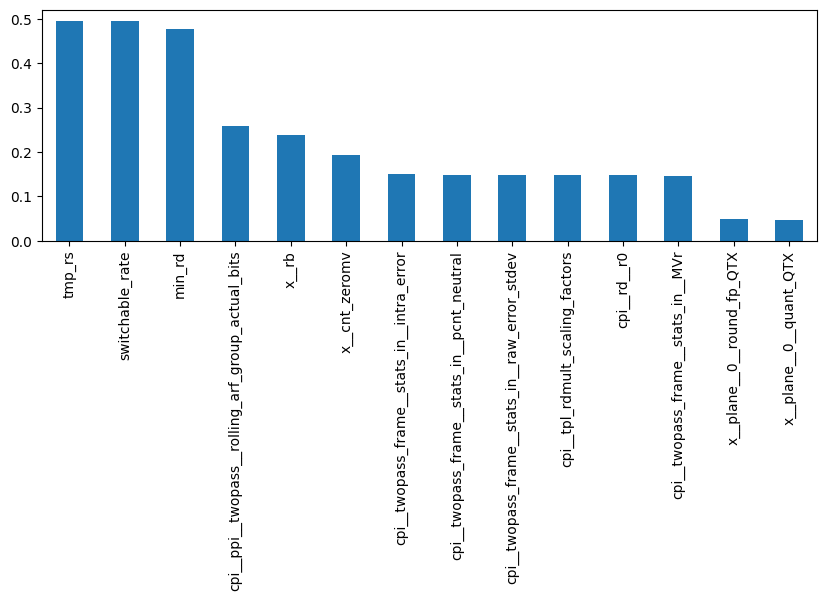

In [11]:
selected_features = mutual_info_num_ser[mutual_info_num_ser > 0.00]
selected_features.sort_values(ascending=False).plot.bar(figsize=(10, 3))

In [12]:
selected_features.index.tolist()

['tmp_rs',
 'min_rd',
 'switchable_rate',
 'x__rb',
 'x__cnt_zeromv',
 'x__plane__0__round_fp_QTX',
 'x__plane__0__quant_QTX',
 'cpi__tpl_rdmult_scaling_factors',
 'cpi__ppi__twopass__rolling_arf_group_actual_bits',
 'cpi__rd__r0',
 'cpi__twopass_frame__stats_in__intra_error',
 'cpi__twopass_frame__stats_in__pcnt_neutral',
 'cpi__twopass_frame__stats_in__MVr',
 'cpi__twopass_frame__stats_in__raw_error_stdev']

In [13]:
num_features_use = [
    'tmp_rs',
    'min_rd',
    'switchable_rate',
    'x__cnt_zeromv',
    'x__plane__0__round_fp_QTX',
    'x__plane__0__quant_QTX',
    'cpi__tpl_rdmult_scaling_factors',
    'cpi__ppi__twopass__rolling_arf_group_actual_bits',
    'cpi__rd__r0',
    'cpi__twopass_frame__stats_in__intra_error',
    'cpi__twopass_frame__stats_in__pcnt_neutral',
    'cpi__twopass_frame__stats_in__MVr',
    'cpi__twopass_frame__stats_in__raw_error_stdev'
]

cat_features_use = [
    'filter_idx',
    'bsize',
    'x__e_mbd__mi__0__mode',
]

In [14]:
train_cat_df = pd.get_dummies(df_train_cat[cat_features_use].astype('category')).astype('bool')
train_num_df = df_train[num_features_use]

test_cat_df = pd.get_dummies(df_test_cat[cat_features_use].astype('category')).astype('bool')
test_num_df = df_test[num_features_use]

In [15]:
X_train = pd.concat([train_num_df, train_cat_df], axis=1)
y_train = df_train['discard']

X_test = pd.concat([test_num_df, test_cat_df], axis=1)
y_test = df_test['discard']

In [16]:
from sklearn.metrics import classification_report
import xgboost as xgb

final_xgb = xgb.XGBClassifier(booster='gblinear', base_score=0.5, random_state=42)
final_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)])
y_pred = final_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

[0]	validation_0-logloss:0.58959
[1]	validation_0-logloss:0.50747
[2]	validation_0-logloss:0.41368
[3]	validation_0-logloss:0.38943
[4]	validation_0-logloss:0.35732
[5]	validation_0-logloss:0.34427
[6]	validation_0-logloss:0.34331
[7]	validation_0-logloss:0.34354
[8]	validation_0-logloss:0.34072
[9]	validation_0-logloss:0.34393
[10]	validation_0-logloss:0.34209
[11]	validation_0-logloss:0.34099
[12]	validation_0-logloss:0.34100
[13]	validation_0-logloss:0.34207
[14]	validation_0-logloss:0.34108
[15]	validation_0-logloss:0.34004
[16]	validation_0-logloss:0.33976
[17]	validation_0-logloss:0.33909
[18]	validation_0-logloss:0.33943
[19]	validation_0-logloss:0.33908
[20]	validation_0-logloss:0.33914
[21]	validation_0-logloss:0.33922
[22]	validation_0-logloss:0.33963
[23]	validation_0-logloss:0.34081
[24]	validation_0-logloss:0.34113
[25]	validation_0-logloss:0.34207
[26]	validation_0-logloss:0.34176
[27]	validation_0-logloss:0.34207
[28]	validation_0-logloss:0.34240
[29]	validation_0-loglos

In [17]:
with open('model_b.c', 'w') as file:
    file.write(export_to_c(model=final_xgb))

In [18]:
final_xgb.save_model(f"model_b.json")

In [19]:
for f, i in enumerate(final_xgb.get_booster().feature_names):
    print(f, i)

0 tmp_rs
1 min_rd
2 switchable_rate
3 x__cnt_zeromv
4 x__plane__0__round_fp_QTX
5 x__plane__0__quant_QTX
6 cpi__tpl_rdmult_scaling_factors
7 cpi__ppi__twopass__rolling_arf_group_actual_bits
8 cpi__rd__r0
9 cpi__twopass_frame__stats_in__intra_error
10 cpi__twopass_frame__stats_in__pcnt_neutral
11 cpi__twopass_frame__stats_in__MVr
12 cpi__twopass_frame__stats_in__raw_error_stdev
13 filter_idx_4
14 filter_idx_5
15 filter_idx_6
16 bsize_128X128
17 bsize_128X64
18 bsize_16X16
19 bsize_16X32
20 bsize_16X4
21 bsize_16X64
22 bsize_16X8
23 bsize_32X16
24 bsize_32X32
25 bsize_32X64
26 bsize_32X8
27 bsize_4X16
28 bsize_4X4
29 bsize_4X8
30 bsize_64X128
31 bsize_64X16
32 bsize_64X32
33 bsize_64X64
34 bsize_8X16
35 bsize_8X32
36 bsize_8X4
37 bsize_8X8
38 x__e_mbd__mi__0__mode_GLOBALMV
39 x__e_mbd__mi__0__mode_NEARESTMV
40 x__e_mbd__mi__0__mode_NEAREST_NEARESTMV
41 x__e_mbd__mi__0__mode_NEAREST_NEWMV
42 x__e_mbd__mi__0__mode_NEARMV
43 x__e_mbd__mi__0__mode_NEAR_NEARMV
44 x__e_mbd__mi__0__mode_NEAR_NE

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 3995,  2365],
       [ 1023, 17788]], dtype=int64)